## Importing the Data 

In [39]:
import numpy as np
import pandas as pd

from sklearn.metrics import (precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, f1_score)
from sklearn import metrics

In [3]:
wine = pd.read_csv(r"C:\Users\HP\Desktop\wine_quality_skylab.csv")
wine

,quality (target),alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
1,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
2,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
3,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
4,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
173,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
174,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
175,2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495


In [4]:
wine.describe()

,quality (target),alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Understanding the Data

In [5]:
wine_one = wine.loc[wine['quality (target)'] == 1]

In [6]:
wine_one.describe()

,quality (target),alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1.0,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
std,0.0,0.461632,0.693400,0.229124,2.561375,10.224654,0.341880,0.400831,0.070648,0.412419,1.249301,0.117463,0.345504,223.352764
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,1.0,13.395000,1.662500,2.292500,16.000000,98.000000,2.600000,2.680000,0.252500,1.630000,4.525000,0.987500,2.870000,986.250000
50%,1.0,13.745000,1.770000,2.445000,16.900000,103.500000,2.825000,2.975000,0.290000,1.865000,5.400000,1.070000,3.135000,1095.000000
75%,1.0,14.090000,1.942500,2.617500,18.750000,112.750000,3.000000,3.247500,0.320000,2.080000,6.237500,1.130000,3.400000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


In [7]:
wine_two = wine.loc[wine['quality (target)'] == 2]

In [8]:
wine_two.describe()

,quality (target),alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [9]:
wine_three = wine.loc[wine['quality (target)'] == 3]

In [10]:
wine_three.describe()

,quality (target),alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

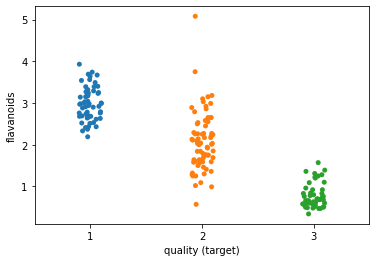

In [52]:
sns.stripplot(x="quality (target)", y="flavanoids", data=wine) 

# özellikle bu feature ve totalPhenol'da sanki biraz daha ayrık gibi

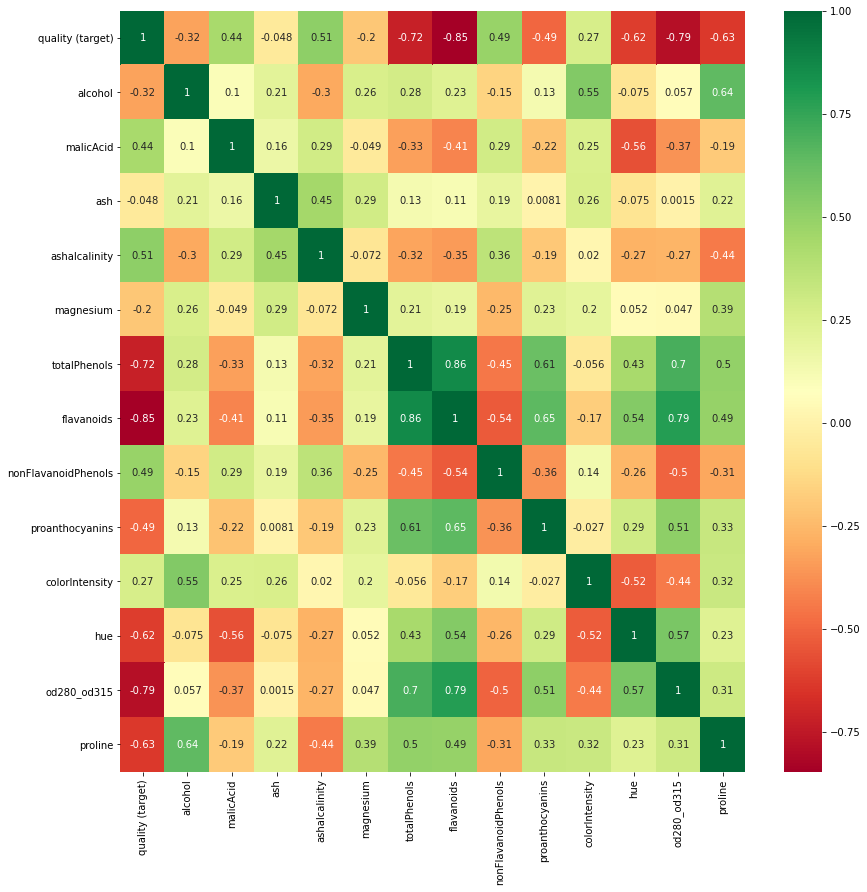

In [13]:
plt.figure(figsize=(14,14))  
p=sns.heatmap(wine.corr(), annot=True,cmap ='RdYlGn')


# feature'ları inceleseydik flavanoid ve totalPhenol birbiriyle oldukça related

# ayrıca target üzerinde de en çok bu iki feature ve od280_od315 etkiliymiş

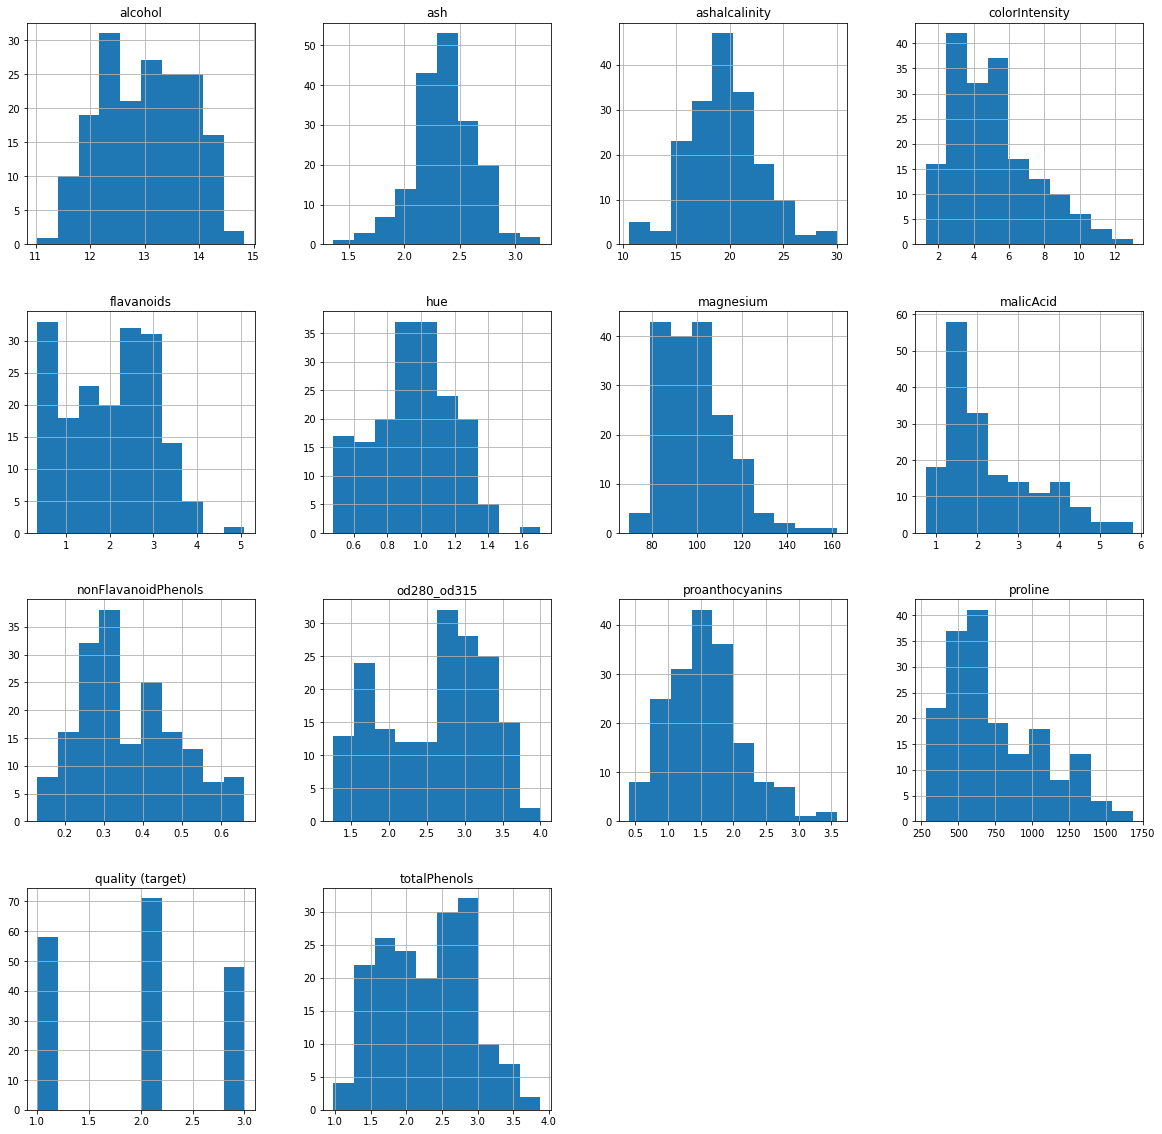

In [14]:
wine.hist(figsize=(20,20));

In [51]:
wine.isnull().values.any() #There are no NaN values in the dataframe - No need to manipulate

False

In [16]:
wine_feat = pd.DataFrame(wine, columns=wine.columns[:-1])

In [28]:
wine_label = pd.DataFrame(wine['quality (target)'].values)

wine_label

,0
0,2
1,2
2,3
3,2
4,1
...,...
172,2
173,1
174,3
175,2


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_feat, wine_label, test_size=0.3, random_state=42)

## Trial of different algorithms

<body>
<ul>
    <li>K-Nearest Neighbors</li>
    <li>Naive Bayes</li>
    <li>Random Forest</li>
</ul>
</body>

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

### Random Forest Classifier

In [33]:
rand_mod = RandomForestClassifier(n_estimators=100)
rand_mod.fit(X_train, Y_train.values.ravel())
Y_pred = rand_mod.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


### K-Nearest Neighbors

In [49]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train.values.ravel()) 

#I have tried with multiple neighbors, and 5 seems to be the best one
  
# accuracy on X_test 
accuracy = knn.score(X_test, Y_test) 
print("Accuracy:",accuracy)

Accuracy: 0.8703703703703703


### Naive-Bayes Classification

In [42]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train.values.ravel()) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, Y_test) 
print("Accuracy:",accuracy)

Accuracy: 1.0
